In [254]:
import requests
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
%matplotlib inline

import nba_api


In [255]:
### Finding and storing Player ID
# Use ternary operator or write function 
# Names are case sensitive
from nba_api.stats.static import players
player_dict = players.get_players()
playerinfo = [player for player in player_dict if player['full_name'] == 'Kristaps Porzingis'][0]

playerid = playerinfo['id']


### Getting Game Data (Kristaps Porzingis)

In [256]:
# First we import the endpoint
# We will be using pandas dataframes to manipulate the data
from nba_api.stats.endpoints import playergamelog
# If you want all seasons, you must import the SeasonAll parameter 
from nba_api.stats.library.parameters import SeasonAll

playerallgames = playergamelog.PlayerGameLog(player_id=playerid, season = SeasonAll.all)
## Convert lists to df
df_playerallgames = playerallgames.get_data_frames()[0]

display(df_playerallgames.columns)

## Adding Opponent Column
df_playerallgames['Opponent'] = df_playerallgames['MATCHUP'].str[-3:]

## Adding Home / Away Column
df_playerallgames["Home/Away"] = df_playerallgames["MATCHUP"].map(lambda x: "Home" if "vs." in x else "Away" if "@" in x else "")

display(df_playerallgames)

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,Opponent,Home/Away
0,22020,204001,0022000943,"APR 29, 2021",DAL @ DET,W,21,5,11,0.455,1,3,0.333,0,0,0.000,0,1,1,0,0,0,0,0,11,-6,1,DET,Away
1,22020,204001,0022000897,"APR 22, 2021",DAL vs. LAL,W,29,6,11,0.545,1,1,1.000,6,7,0.857,2,4,6,1,1,0,0,3,19,-6,1,LAL,Home
2,22020,204001,0022000442,"APR 21, 2021",DAL vs. DET,W,33,6,13,0.462,2,5,0.400,5,6,0.833,1,6,7,4,3,0,0,6,19,5,1,DET,Home
3,22020,204001,0022000866,"APR 18, 2021",DAL vs. SAC,L,37,3,14,0.214,1,7,0.143,2,2,1.000,2,9,11,3,0,0,0,1,9,-24,1,SAC,Home
4,22020,204001,0022000854,"APR 16, 2021",DAL vs. NYK,L,38,8,20,0.400,2,8,0.250,5,5,1.000,3,9,12,1,1,2,3,1,23,-4,1,NYK,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,22015,204001,0021500063,"NOV 04, 2015",NYK @ CLE,L,21,6,11,0.545,1,4,0.250,0,0,0.000,1,3,4,1,2,2,0,5,13,-1,1,CLE,Away
279,22015,204001,0021500048,"NOV 02, 2015",NYK vs. SAS,L,24,5,15,0.333,1,5,0.200,2,2,1.000,8,6,14,1,3,2,2,5,13,-8,1,SAS,Home
280,22015,204001,0021500034,"OCT 31, 2015",NYK @ WAS,W,21,3,6,0.500,0,0,0.000,2,2,1.000,1,5,6,0,0,0,1,4,8,10,1,WAS,Away
281,22015,204001,0021500019,"OCT 29, 2015",NYK vs. ATL,L,26,4,10,0.400,0,4,0.000,2,2,1.000,2,6,8,0,3,1,4,5,10,-5,1,ATL,Home


### Checking Data 

In [257]:
df_playerallgames.dtypes

SEASON_ID           object
Player_ID            int64
Game_ID             object
GAME_DATE           object
MATCHUP             object
WL                  object
MIN                  int64
FGM                  int64
FGA                  int64
FG_PCT             float64
FG3M                 int64
FG3A                 int64
FG3_PCT            float64
FTM                  int64
FTA                  int64
FT_PCT             float64
OREB                 int64
DREB                 int64
REB                  int64
AST                  int64
STL                  int64
BLK                  int64
TOV                  int64
PF                   int64
PTS                  int64
PLUS_MINUS           int64
VIDEO_AVAILABLE      int64
Opponent            object
Home/Away           object
dtype: object

In [258]:
df_playerallgames.isnull().values.any()

False

In [259]:
df_playerallgames.describe()

,Player_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
count,283.0,283.000000,283.000000,283.00000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,204001.0,31.176678,6.738516,15.30742,0.433943,1.812721,5.056537,0.330074,3.378092,4.180212,0.693954,1.703180,6.137809,7.840989,1.462898,0.692580,1.943463,1.678445,3.113074,18.667845,0.745583,1.021201
std,0.0,6.146892,2.981414,4.68900,0.134477,1.455089,2.527224,0.232798,2.587850,3.078068,0.348627,1.474448,2.839454,3.385327,1.229600,0.875705,1.565469,1.279598,1.564660,7.880935,12.184411,0.144310
min,204001.0,3.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.000000,1.000000
25%,204001.0,28.000000,5.000000,12.00000,0.355000,1.000000,3.000000,0.167000,2.000000,2.000000,0.500000,1.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000,2.000000,13.000000,-7.000000,1.000000
50%,204001.0,32.000000,7.000000,15.00000,0.438000,2.000000,5.000000,0.333000,3.000000,4.000000,0.778000,2.000000,6.000000,8.000000,1.000000,0.000000,2.000000,2.000000,3.000000,18.000000,-1.000000,1.000000
75%,204001.0,36.000000,9.000000,18.00000,0.510000,3.000000,7.000000,0.500000,5.000000,6.000000,1.000000,3.000000,8.000000,10.000000,2.000000,1.000000,3.000000,2.000000,4.000000,24.000000,9.000000,1.000000
max,204001.0,45.000000,15.000000,28.00000,1.000000,8.000000,14.000000,1.000000,12.000000,14.000000,1.000000,9.000000,15.000000,18.000000,5.000000,5.000000,7.000000,5.000000,6.000000,40.000000,38.000000,2.000000


### Exploratory Data Analysis

In [260]:
eda = df_playerallgames

In [261]:
eda.GAME_DATE = pd.to_datetime(eda.GAME_DATE, errors='coerce')

In [262]:
display(eda)

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,Opponent,Home/Away
0,22020,204001,0022000943,2021-04-29,DAL @ DET,W,21,5,11,0.455,1,3,0.333,0,0,0.000,0,1,1,0,0,0,0,0,11,-6,1,DET,Away
1,22020,204001,0022000897,2021-04-22,DAL vs. LAL,W,29,6,11,0.545,1,1,1.000,6,7,0.857,2,4,6,1,1,0,0,3,19,-6,1,LAL,Home
2,22020,204001,0022000442,2021-04-21,DAL vs. DET,W,33,6,13,0.462,2,5,0.400,5,6,0.833,1,6,7,4,3,0,0,6,19,5,1,DET,Home
3,22020,204001,0022000866,2021-04-18,DAL vs. SAC,L,37,3,14,0.214,1,7,0.143,2,2,1.000,2,9,11,3,0,0,0,1,9,-24,1,SAC,Home
4,22020,204001,0022000854,2021-04-16,DAL vs. NYK,L,38,8,20,0.400,2,8,0.250,5,5,1.000,3,9,12,1,1,2,3,1,23,-4,1,NYK,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,22015,204001,0021500063,2015-11-04,NYK @ CLE,L,21,6,11,0.545,1,4,0.250,0,0,0.000,1,3,4,1,2,2,0,5,13,-1,1,CLE,Away
279,22015,204001,0021500048,2015-11-02,NYK vs. SAS,L,24,5,15,0.333,1,5,0.200,2,2,1.000,8,6,14,1,3,2,2,5,13,-8,1,SAS,Home
280,22015,204001,0021500034,2015-10-31,NYK @ WAS,W,21,3,6,0.500,0,0,0.000,2,2,1.000,1,5,6,0,0,0,1,4,8,10,1,WAS,Away
281,22015,204001,0021500019,2015-10-29,NYK vs. ATL,L,26,4,10,0.400,0,4,0.000,2,2,1.000,2,6,8,0,3,1,4,5,10,-5,1,ATL,Home


Correlation between various features


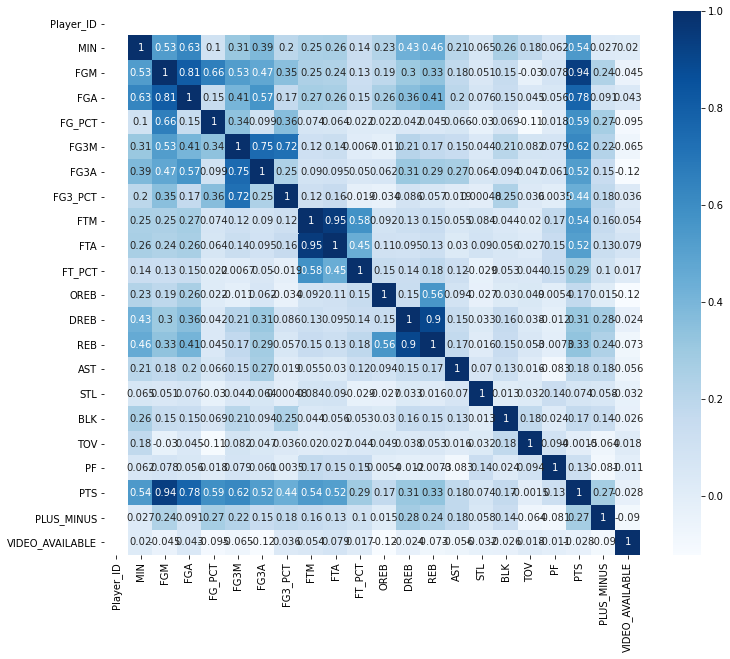

In [263]:
### Correlation between all features

plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(eda.corr(), annot=True,cmap ='Blues')

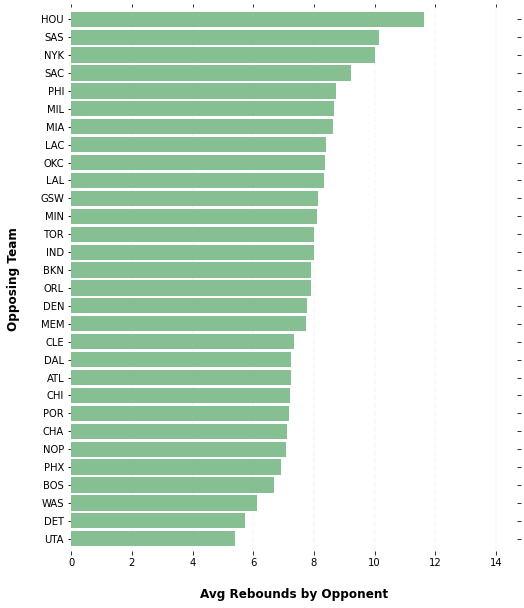

In [264]:
### Avg. rebounds by opponent

avgreboundsbyopponent = eda.groupby(['Opponent'])['REB'].mean().sort_values()



ax = avgreboundsbyopponent.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Avg Rebounds by Opponent", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Opposing Team", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


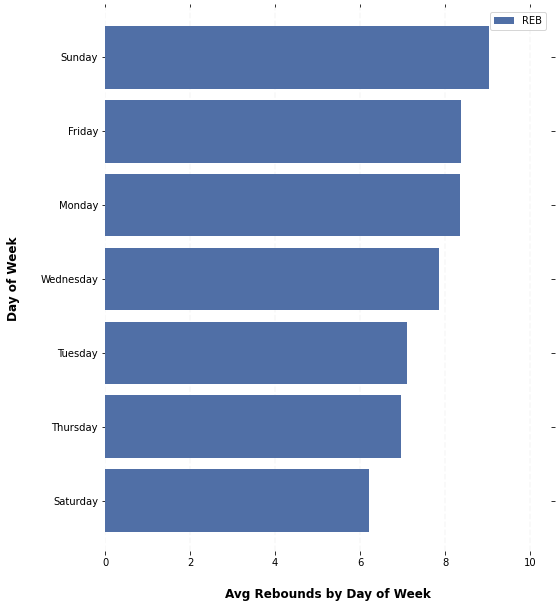

In [265]:
### Avg Rebounds by Weekday

rebsbyweekday = pd.DataFrame(eda.groupby(eda['GAME_DATE'].dt.day_name()).REB.mean().sort_values().reset_index())


ax = rebsbyweekday.plot(kind='barh', x='GAME_DATE', y='REB', figsize=(8, 10), color='#506fa6', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Avg Rebounds by Day of Week", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Day of Week", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

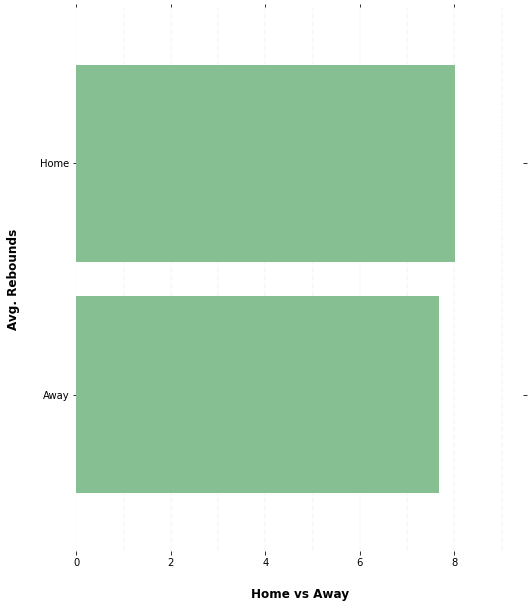

In [266]:
### Avg Rebounds Home vs. Away

rebsbyhomevsaway = eda.groupby(['Home/Away'])['REB'].mean().sort_values()



ax = rebsbyhomevsaway.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Home vs Away", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Avg. Rebounds", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))



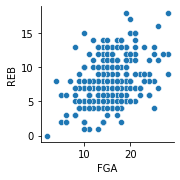

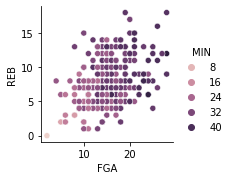

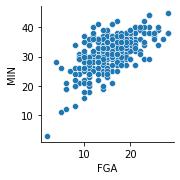

In [267]:
### Correlation between FGA and REBS

FGAvsREBS = sns.pairplot(eda, x_vars='FGA', y_vars='REB')


### Correlation between REBS and FGA (min HUE)

FGAvsREBShueMIN = sns.pairplot(eda, x_vars='FGA', y_vars='REB', hue='MIN')

### Correlation between Min and REBS

FGAvsREBShueMIN = sns.pairplot(eda, x_vars='FGA', y_vars='MIN')

### Cleaning and Transforming Data (Deep Learning)


In [268]:
playercleaned = df_playerallgames[['SEASON_ID', 'Player_ID', 'Game_ID', 'WL', 'REB', 'Opponent', 'Home/Away', 'GAME_DATE']]

playercleaned = pd.get_dummies(playercleaned, columns=['Opponent'])
playercleaned = pd.get_dummies(playercleaned, columns=['Home/Away'])
playercleaned = pd.get_dummies(playercleaned, columns=['WL'])
playercleaned['Rebs>=8'] = np.where(playercleaned['REB']>=8, '1', '0')

display(playercleaned)

,SEASON_ID,Player_ID,Game_ID,REB,GAME_DATE,Opponent_ATL,Opponent_BKN,Opponent_BOS,Opponent_CHA,Opponent_CHI,Opponent_CLE,Opponent_DAL,Opponent_DEN,Opponent_DET,Opponent_GSW,Opponent_HOU,Opponent_IND,Opponent_LAC,Opponent_LAL,Opponent_MEM,Opponent_MIA,Opponent_MIL,Opponent_MIN,Opponent_NOP,Opponent_NYK,Opponent_OKC,Opponent_ORL,Opponent_PHI,Opponent_PHX,Opponent_POR,Opponent_SAC,Opponent_SAS,Opponent_TOR,Opponent_UTA,Opponent_WAS,Home/Away_Away,Home/Away_Home,WL_L,WL_W,Rebs>=8
0,22020,204001,0022000943,1,2021-04-29,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,22020,204001,0022000897,6,2021-04-22,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,22020,204001,0022000442,7,2021-04-21,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,22020,204001,0022000866,11,2021-04-18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1
4,22020,204001,0022000854,12,2021-04-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,22015,204001,0021500063,4,2015-11-04,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
279,22015,204001,0021500048,14,2015-11-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1
280,22015,204001,0021500034,6,2015-10-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
281,22015,204001,0021500019,8,2015-10-29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1


In [269]:
from keras.utils.np_utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping



predictors = playercleaned.drop(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'Rebs>=8', 'REB', 'WL_L', 'WL_W'], axis=1)
target = to_categorical(playercleaned['Rebs>=8'])
display(target)
n_cols = predictors.shape[1]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [270]:
model = Sequential()

model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=2)
model.fit(predictors, target, validation_split=0.25, epochs=20, callbacks=[early_stopping_monitor])

Epoch 1/20
7/7 [==============================] - 1s 48ms/step - loss: 0.6931 - accuracy: 0.5378 - val_loss: 0.7298 - val_accuracy: 0.3944
Epoch 2/20
7/7 [==============================] - 0s 11ms/step - loss: 0.6801 - accuracy: 0.5554 - val_loss: 0.7129 - val_accuracy: 0.4507
Epoch 3/20
7/7 [==============================] - 0s 11ms/step - loss: 0.6765 - accuracy: 0.5791 - val_loss: 0.7067 - val_accuracy: 0.4648
Epoch 4/20
7/7 [==============================] - 0s 11ms/step - loss: 0.6653 - accuracy: 0.6378 - val_loss: 0.7003 - val_accuracy: 0.4648
Epoch 5/20
7/7 [==============================] - 0s 11ms/step - loss: 0.6551 - accuracy: 0.7064 - val_loss: 0.7060 - val_accuracy: 0.4507
Epoch 6/20
7/7 [==============================] - 0s 11ms/step - loss: 0.6565 - accuracy: 0.6655 - val_loss: 0.7218 - val_accuracy: 0.4648


In [271]:
### test on random dataset 

predictorsnew = playercleaned.drop(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'Rebs>=8', 'REB', 'WL_L', 'WL_W'], axis=1)

predictorsnew = predictorsnew.sample(50)

In [272]:
### Notes
### If data is imbalanced, easy to obtain high accuracy
### F1 Score 
### running average of rebounds
### Test some classical methods (Knearest Neighbors)
## Height
## Positions




### Jeremy howard course
### Greddle/ Kotlin

In [273]:
from keras.models import load_model
model.save('rebounds.h5')

my_model = load_model('rebounds.h5')

predictions = my_model.predict(predictorsnew)
np.set_printoptions(suppress=True)
display(predictions)

probability_true = predictions[:,1]

display(probability_true)

display()

array([[0.42467132, 0.5753287 ],
       [0.45012972, 0.5498703 ],
       [0.45226994, 0.5477301 ],
       [0.38028198, 0.61971796],
       [0.49669275, 0.50330734],
       [0.41838738, 0.5816126 ],
       [0.36603078, 0.6339692 ],
       [0.45012972, 0.5498703 ],
       [0.4298558 , 0.5701442 ],
       [0.3791313 , 0.6208687 ],
       [0.32228664, 0.67771345],
       [0.3114965 , 0.68850356],
       [0.32228664, 0.67771345],
       [0.48242337, 0.51757663],
       [0.47971517, 0.52028483],
       [0.42830613, 0.57169384],
       [0.3987666 , 0.6012334 ],
       [0.45226994, 0.5477301 ],
       [0.45373428, 0.5462657 ],
       [0.4298558 , 0.5701442 ],
       [0.42214996, 0.57785004],
       [0.4012541 , 0.5987459 ],
       [0.38712958, 0.61287045],
       [0.5232732 , 0.47672674],
       [0.5715153 , 0.4284847 ],
       [0.3849098 , 0.6150902 ],
       [0.57717776, 0.42282224],
       [0.3849098 , 0.6150902 ],
       [0.36485875, 0.63514125],
       [0.5232732 , 0.47672674],
       [0.

array([0.5753287 , 0.5498703 , 0.5477301 , 0.61971796, 0.50330734,
       0.5816126 , 0.6339692 , 0.5498703 , 0.5701442 , 0.6208687 ,
       0.67771345, 0.68850356, 0.67771345, 0.51757663, 0.52028483,
       0.57169384, 0.6012334 , 0.5477301 , 0.5462657 , 0.5701442 ,
       0.57785004, 0.5987459 , 0.61287045, 0.47672674, 0.4284847 ,
       0.6150902 , 0.42282224, 0.6150902 , 0.63514125, 0.47672674,
       0.6088569 , 0.5057582 , 0.5890821 , 0.5057582 , 0.4284847 ,
       0.68850356, 0.5914104 , 0.58463204, 0.61863387, 0.5685229 ,
       0.5987459 , 0.5685229 , 0.6088569 , 0.4284847 , 0.52019626,
       0.6012334 , 0.6088569 , 0.5498703 , 0.47672674, 0.5810674 ],
      dtype=float32)

In [274]:
### Formatting input for day-to-day games

predictortemplate = playercleaned.drop(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'Rebs>=8', 'REB', 'WL_W', 'WL_L'], axis=1).head(1)
pd.set_option('display.max_columns', None)
predictortemplate['Opponent_DET'] = 0
predictortemplate['Opponent_WAS'] = 0
predictortemplate['Opponent_DAL'] = 1
predictortemplate['Home/Away_Away'] = 0
predictortemplate['Home/Away_Home'] = 1
print(predictortemplate.shape)

(1, 32)


In [275]:
predictions = my_model.predict(predictortemplate)
np.set_printoptions(suppress=True)
display(predictions)

probability_true = predictions[:,1]

display(probability_true)

display()

array([[0.36754853, 0.6324515 ]], dtype=float32)

array([0.6324515], dtype=float32)

#### Testing on 2021 Data


In [276]:
# First we import the endpoint
# We will be using pandas dataframes to manipulate the data
from nba_api.stats.endpoints import playergamelog

gamelog = playergamelog.PlayerGameLog(player_id=playerid, season = '2020')

#Converts gamelog object into a pandas dataframe

df_games_2020 = gamelog.get_data_frames()[0]

display(df_games_2020)

## Adding Opponent Column
df_games_2020['Opponent'] = df_games_2020['MATCHUP'].str[-3:]

## Adding Home / Away Column
df_games_2020["Home/Away"] = df_games_2020["MATCHUP"].map(lambda x: "Home" if "vs." in x else "Away" if "@" in x else "")

display(df_games_2020)

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22020,204001,0022000943,"APR 29, 2021",DAL @ DET,W,21,5,11,0.455,1,3,0.333,0,0,0.000,0,1,1,0,0,0,0,0,11,-6,1
1,22020,204001,0022000897,"APR 22, 2021",DAL vs. LAL,W,29,6,11,0.545,1,1,1.000,6,7,0.857,2,4,6,1,1,0,0,3,19,-6,1
2,22020,204001,0022000442,"APR 21, 2021",DAL vs. DET,W,33,6,13,0.462,2,5,0.400,5,6,0.833,1,6,7,4,3,0,0,6,19,5,1
3,22020,204001,0022000866,"APR 18, 2021",DAL vs. SAC,L,37,3,14,0.214,1,7,0.143,2,2,1.000,2,9,11,3,0,0,0,1,9,-24,1
4,22020,204001,0022000854,"APR 16, 2021",DAL vs. NYK,L,38,8,20,0.400,2,8,0.250,5,5,1.000,3,9,12,1,1,2,3,1,23,-4,1
5,22020,204001,0022000837,"APR 14, 2021",DAL @ MEM,W,32,7,13,0.538,2,5,0.400,5,5,1.000,1,5,6,1,0,0,1,4,21,4,1
6,22020,204001,0022000810,"APR 11, 2021",DAL vs. SAS,L,36,12,21,0.571,3,8,0.375,4,4,1.000,3,12,15,3,0,2,3,6,31,-4,1
7,22020,204001,0022000786,"APR 08, 2021",DAL vs. MIL,W,33,10,20,0.500,4,7,0.571,2,2,1.000,6,11,17,1,0,2,1,2,26,17,1
8,22020,204001,0022000456,"APR 07, 2021",DAL @ HOU,L,36,10,19,0.526,2,4,0.500,1,1,1.000,3,9,12,1,0,1,1,0,23,-19,1
9,22020,204001,0022000739,"APR 02, 2021",DAL @ NYK,W,34,6,17,0.353,1,7,0.143,1,2,0.500,0,8,8,1,0,1,3,1,14,16,1


,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,Opponent,Home/Away
0,22020,204001,0022000943,"APR 29, 2021",DAL @ DET,W,21,5,11,0.455,1,3,0.333,0,0,0.000,0,1,1,0,0,0,0,0,11,-6,1,DET,Away
1,22020,204001,0022000897,"APR 22, 2021",DAL vs. LAL,W,29,6,11,0.545,1,1,1.000,6,7,0.857,2,4,6,1,1,0,0,3,19,-6,1,LAL,Home
2,22020,204001,0022000442,"APR 21, 2021",DAL vs. DET,W,33,6,13,0.462,2,5,0.400,5,6,0.833,1,6,7,4,3,0,0,6,19,5,1,DET,Home
3,22020,204001,0022000866,"APR 18, 2021",DAL vs. SAC,L,37,3,14,0.214,1,7,0.143,2,2,1.000,2,9,11,3,0,0,0,1,9,-24,1,SAC,Home
4,22020,204001,0022000854,"APR 16, 2021",DAL vs. NYK,L,38,8,20,0.400,2,8,0.250,5,5,1.000,3,9,12,1,1,2,3,1,23,-4,1,NYK,Home
5,22020,204001,0022000837,"APR 14, 2021",DAL @ MEM,W,32,7,13,0.538,2,5,0.400,5,5,1.000,1,5,6,1,0,0,1,4,21,4,1,MEM,Away
6,22020,204001,0022000810,"APR 11, 2021",DAL vs. SAS,L,36,12,21,0.571,3,8,0.375,4,4,1.000,3,12,15,3,0,2,3,6,31,-4,1,SAS,Home
7,22020,204001,0022000786,"APR 08, 2021",DAL vs. MIL,W,33,10,20,0.500,4,7,0.571,2,2,1.000,6,11,17,1,0,2,1,2,26,17,1,MIL,Home
8,22020,204001,0022000456,"APR 07, 2021",DAL @ HOU,L,36,10,19,0.526,2,4,0.500,1,1,1.000,3,9,12,1,0,1,1,0,23,-19,1,HOU,Away
9,22020,204001,0022000739,"APR 02, 2021",DAL @ NYK,W,34,6,17,0.353,1,7,0.143,1,2,0.500,0,8,8,1,0,1,3,1,14,16,1,NYK,Away


In [277]:
playercleaned2021 = df_games_2020[['SEASON_ID', 'Player_ID', 'Game_ID', 'WL', 'REB', 'Opponent', 'Home/Away', 'GAME_DATE']]

playercleaned2021 = pd.get_dummies(playercleaned2021, columns=['Opponent'])
playercleaned2021 = pd.get_dummies(playercleaned2021, columns=['Home/Away'])
playercleaned2021 = pd.get_dummies(playercleaned2021, columns=['WL'])
playercleaned2021['Rebs>=8'] = np.where(playercleaned2021['REB']>=8, '1', '0')

display(playercleaned2021)

,SEASON_ID,Player_ID,Game_ID,REB,GAME_DATE,Opponent_ATL,Opponent_BKN,Opponent_BOS,Opponent_CHA,Opponent_CHI,Opponent_DEN,Opponent_DET,Opponent_GSW,Opponent_HOU,Opponent_IND,Opponent_LAC,Opponent_LAL,Opponent_MEM,Opponent_MIL,Opponent_MIN,Opponent_NOP,Opponent_NYK,Opponent_OKC,Opponent_ORL,Opponent_PHX,Opponent_POR,Opponent_SAC,Opponent_SAS,Opponent_TOR,Opponent_UTA,Home/Away_Away,Home/Away_Home,WL_L,WL_W,Rebs>=8
0,22020,204001,0022000943,1,"APR 29, 2021",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,22020,204001,0022000897,6,"APR 22, 2021",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,22020,204001,0022000442,7,"APR 21, 2021",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,22020,204001,0022000866,11,"APR 18, 2021",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1
4,22020,204001,0022000854,12,"APR 16, 2021",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1
5,22020,204001,0022000837,6,"APR 14, 2021",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
6,22020,204001,0022000810,15,"APR 11, 2021",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
7,22020,204001,0022000786,17,"APR 08, 2021",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
8,22020,204001,0022000456,12,"APR 07, 2021",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
9,22020,204001,0022000739,8,"APR 02, 2021",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1


In [278]:

from keras.utils.np_utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping



predictors2021 = playercleaned2021.drop(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'Rebs>=8', 'REB', 'WL_L', 'WL_W'], axis=1)
target2021 = to_categorical(playercleaned2021['Rebs>=8'])
display(target2021)
n_cols2021 = predictors2021.shape[1]

predictors2021.shape

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

(40, 27)

In [279]:
model2021 = Sequential()

model2021.add(Dense(100, activation='relu', input_shape = (n_cols2021,)))
model2021.add(Dense(100, activation='relu'))
model2021.add(Dense(100, activation='relu'))
model2021.add(Dense(2, activation='softmax'))
model2021.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=2)
model2021.fit(predictors2021, target2021, validation_split=0.25, epochs=20, callbacks=[early_stopping_monitor])



Epoch 1/20
1/1 [==============================] - 1s 852ms/step - loss: 0.7393 - accuracy: 0.2333 - val_loss: 0.7037 - val_accuracy: 0.4000
Epoch 2/20
1/1 [==============================] - 0s 66ms/step - loss: 0.7139 - accuracy: 0.3000 - val_loss: 0.6868 - val_accuracy: 0.7000
Epoch 3/20
1/1 [==============================] - 0s 52ms/step - loss: 0.6918 - accuracy: 0.6000 - val_loss: 0.6719 - val_accuracy: 0.7000
Epoch 4/20
1/1 [==============================] - 0s 65ms/step - loss: 0.6721 - accuracy: 0.6667 - val_loss: 0.6602 - val_accuracy: 0.7000
Epoch 5/20
1/1 [==============================] - 0s 55ms/step - loss: 0.6546 - accuracy: 0.6667 - val_loss: 0.6502 - val_accuracy: 0.7000
Epoch 6/20
1/1 [==============================] - 0s 63ms/step - loss: 0.6391 - accuracy: 0.6667 - val_loss: 0.6419 - val_accuracy: 0.7000
Epoch 7/20
1/1 [==============================] - 0s 61ms/step - loss: 0.6251 - accuracy: 0.6667 - val_loss: 0.6353 - val_accuracy: 0.7000
Epoch 8/20
1/1 [==========

In [280]:
### Formatting input for day-to-day games

from keras.models import load_model
model.save('rebounds2021.h5')

my_model2021 = load_model('rebounds2021.h5')




In [281]:

predictortemplate2021 = predictors2021.head(1)
pd.set_option('display.max_columns', None)
predictortemplate2021['Opponent_DET'] = 0
predictortemplate2021['Opponent_WAS'] = 0
predictortemplate2021['Opponent_DAL'] = 1
predictortemplate2021['Home/Away_Away'] = 0
predictortemplate2021['Home/Away_Home'] = 1
display(predictortemplate2021.shape)

<ipython-input-281-08049ebdc373>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictortemplate2021['Opponent_DET'] = 0
<ipython-input-281-08049ebdc373>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictortemplate2021['Opponent_WAS'] = 0
<ipython-input-281-08049ebdc373>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

(1, 29)

### Cleaning and Transforming Data (K-Nearest Neighbors)

In [282]:
knncleaning = df_playerallgames[['SEASON_ID', 'Player_ID', 'Game_ID', 'WL', 'REB', 'Opponent', 'Home/Away', 'GAME_DATE']]


In [283]:
knncleaning["WL"] = knncleaning["WL"].map(lambda x: "1" if "W" in x else "0" if "L" in x else "")
knncleaning = pd.get_dummies(knncleaning, columns=['Opponent'])
knncleaning = pd.get_dummies(knncleaning, columns=['Home/Away'])


<ipython-input-283-d0bc426dde7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knncleaning["WL"] = knncleaning["WL"].map(lambda x: "1" if "W" in x else "0" if "L" in x else "")


In [284]:
knncleaning['Rebs>=8'] = np.where(knncleaning['REB']>=8, '1', '0')

In [285]:
display(knncleaning)

,SEASON_ID,Player_ID,Game_ID,WL,REB,GAME_DATE,Opponent_ATL,Opponent_BKN,Opponent_BOS,Opponent_CHA,Opponent_CHI,Opponent_CLE,Opponent_DAL,Opponent_DEN,Opponent_DET,Opponent_GSW,Opponent_HOU,Opponent_IND,Opponent_LAC,Opponent_LAL,Opponent_MEM,Opponent_MIA,Opponent_MIL,Opponent_MIN,Opponent_NOP,Opponent_NYK,Opponent_OKC,Opponent_ORL,Opponent_PHI,Opponent_PHX,Opponent_POR,Opponent_SAC,Opponent_SAS,Opponent_TOR,Opponent_UTA,Opponent_WAS,Home/Away_Away,Home/Away_Home,Rebs>=8
0,22020,204001,0022000943,1,1,2021-04-29,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,22020,204001,0022000897,1,6,2021-04-22,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,22020,204001,0022000442,1,7,2021-04-21,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,22020,204001,0022000866,0,11,2021-04-18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
4,22020,204001,0022000854,0,12,2021-04-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,22015,204001,0021500063,0,4,2015-11-04,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
279,22015,204001,0021500048,0,14,2015-11-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
280,22015,204001,0021500034,1,6,2015-10-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
281,22015,204001,0021500019,0,8,2015-10-29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [286]:
y = knncleaning['Rebs>=8']
X = knncleaning.drop(columns=['Rebs>=8', 'GAME_DATE', 'REB'],
               axis = 1) 

In [287]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [288]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_test)

array([[-0.00842122,  0.        , -0.01031587, ..., -0.16095569,
        -0.98994949,  0.98994949],
       [-1.12002234,  0.        , -1.11853442, ..., -0.16095569,
        -0.98994949,  0.98994949],
       [-0.00842122,  0.        , -0.01062153, ..., -0.16095569,
        -0.98994949,  0.98994949],
       ...,
       [ 1.65898046,  0.        ,  1.66005089, ..., -0.16095569,
         1.01015254, -1.01015254],
       [-0.00842122,  0.        , -0.00825403, ..., -0.16095569,
        -0.98994949,  0.98994949],
       [-1.12002234,  0.        , -1.12161328, ..., -0.16095569,
         1.01015254, -1.01015254]])

In [289]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,30):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [290]:
print(test_scores, train_scores)

len(test_scores)
len(train_scores)

[0.5294117647058824, 0.5294117647058824, 0.5647058823529412, 0.5529411764705883, 0.5529411764705883, 0.5647058823529412, 0.5764705882352941, 0.5882352941176471, 0.5764705882352941, 0.6, 0.6, 0.5882352941176471, 0.5764705882352941, 0.5647058823529412, 0.5882352941176471, 0.5764705882352941, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5647058823529412, 0.6, 0.6, 0.6, 0.5764705882352941, 0.5647058823529412, 0.5764705882352941, 0.5647058823529412, 0.5294117647058824] [1.0, 0.7878787878787878, 0.7828282828282829, 0.7323232323232324, 0.7474747474747475, 0.7222222222222222, 0.7171717171717171, 0.7070707070707071, 0.696969696969697, 0.702020202020202, 0.6919191919191919, 0.6717171717171717, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6717171717171717, 0.6464646464646465, 0.6616161616161617, 0.6616161616161617, 0.6616161616161617, 0.6717171717171717, 0.6818181818181818, 0.6717171717171717, 0.6868686868686869, 0.6767676767676768, 0.66666666

29

In [291]:
print(max(test_scores)) 
### Optimal Nearest neighbours is 8

0.6


C:\Users\Mario Hage\DS Springboard\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mario Hage\DS Springboard\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


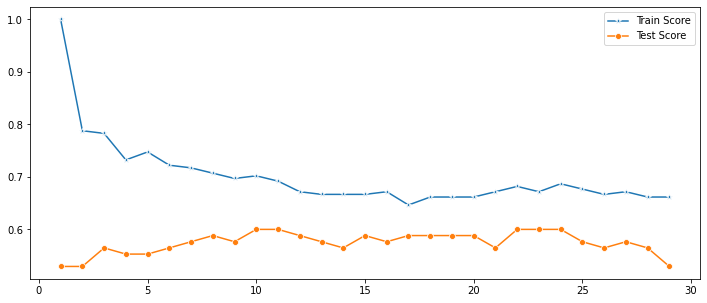

In [292]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,30),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,30),test_scores,marker='o',label='Test Score')

In [293]:
knn = KNeighborsClassifier(8)
knn.fit(X_train,y_train)
    
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.7070707070707071
0.5882352941176471


In [294]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)
print(pl)

[[30 13]
 [22 20]]


In [295]:

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.58      0.70      0.63        43
           1       0.61      0.48      0.53        42

    accuracy                           0.59        85
   macro avg       0.59      0.59      0.58        85
weighted avg       0.59      0.59      0.58        85



In [296]:
### Trying Grid Search

from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [297]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.47368421052631576
Best Parameters: {'n_neighbors': 33}


### Random Forest Implementation 

In [298]:
rfcleaning = knncleaning

In [299]:
display(rfcleaning)

,SEASON_ID,Player_ID,Game_ID,WL,REB,GAME_DATE,Opponent_ATL,Opponent_BKN,Opponent_BOS,Opponent_CHA,Opponent_CHI,Opponent_CLE,Opponent_DAL,Opponent_DEN,Opponent_DET,Opponent_GSW,Opponent_HOU,Opponent_IND,Opponent_LAC,Opponent_LAL,Opponent_MEM,Opponent_MIA,Opponent_MIL,Opponent_MIN,Opponent_NOP,Opponent_NYK,Opponent_OKC,Opponent_ORL,Opponent_PHI,Opponent_PHX,Opponent_POR,Opponent_SAC,Opponent_SAS,Opponent_TOR,Opponent_UTA,Opponent_WAS,Home/Away_Away,Home/Away_Home,Rebs>=8
0,22020,204001,0022000943,1,1,2021-04-29,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,22020,204001,0022000897,1,6,2021-04-22,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,22020,204001,0022000442,1,7,2021-04-21,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,22020,204001,0022000866,0,11,2021-04-18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
4,22020,204001,0022000854,0,12,2021-04-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,22015,204001,0021500063,0,4,2015-11-04,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
279,22015,204001,0021500048,0,14,2015-11-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
280,22015,204001,0021500034,1,6,2015-10-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
281,22015,204001,0021500019,0,8,2015-10-29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [300]:
y1 = rfcleaning['Rebs>=8']
X1 = rfcleaning.drop(columns=['Rebs>=8', 'GAME_DATE', 'REB'],
               axis = 1) 

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=.3, random_state=1)

In [302]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [303]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [304]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.635
Random Forest: f1-score=0.636


30


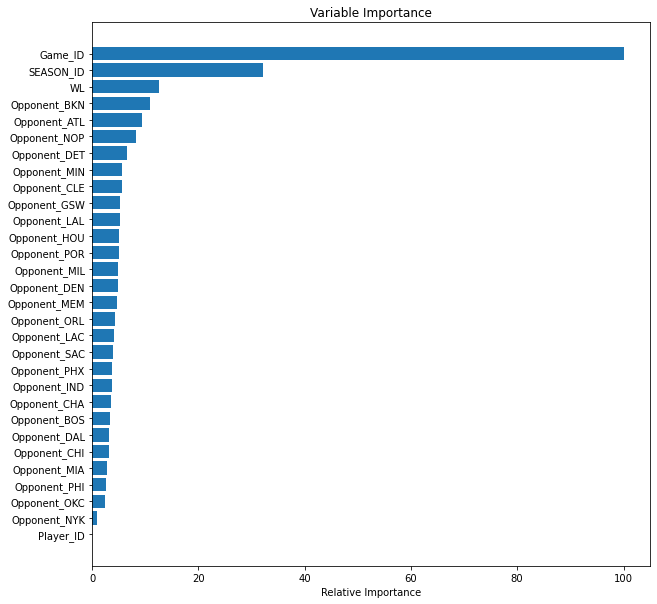

In [305]:
### Plotting Feature Importance

feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Logistic Regression Implementation

In [310]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

y1 = rfcleaning['Rebs>=8']
X1 = rfcleaning.drop(columns=['Rebs>=8', 'GAME_DATE', 'REB'],
               axis = 1) 
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(rfcleaning.drop(columns=['Rebs>=8', 'GAME_DATE', 'REB'],
axis = 1),rfcleaning['Rebs>=8'],random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))
print(f1_score(clf.predict(Xtestlr), ytestlr, average='weighted'))


0.4647887323943662
0.6346153846153846


In [307]:
accLr = 0.46

accknn = 0.6

accrf = 0.635

accs = [[accLr, accknn, accrf]]

accuracyreport = pd.DataFrame(accs, columns=['Logistic Regression Accuracy', 'KNN Accuracy', 'Random Forest Accuracy'])

In [308]:
display(accuracyreport)

,Logistic Regression Accuracy,KNN Accuracy,Random Forest Accuracy
0,0.46,0.6,0.635
